Connected to base (Python 3.12.4)

In [ ]:
coef = model.coef().reset_index()
se = model.se().reset_index()
estimates = pd.merge(coef, se, on="Coefficient")
estimates["lower_bound"] = estimates["Estimate"] - estimates["Std. Error"] * 1.96
estimates["upper_bound"] = estimates["Estimate"] + estimates["Std. Error"] * 1.96
estimates["event_time"] = (
    estimates["Coefficient"]
    .str.replace("minus_", "-", regex=False)
    .str.replace("T_", "", regex=False)
    ).astype(int)

NameError: name 'model' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyfixest as pf
import re

from event_study_functions import *

event_study_simultaneous = run_dynamic_did("output/panel_data_simultaneous.csv")
event_study_staggered = run_dynamic_did("output/panel_data_staggered.csv")

pf.etable([event_study_staggered, event_study_simultaneous])


model = event_study_simultaneous

In [ ]:
coef = model.coef().reset_index()
se = model.se().reset_index()
estimates = pd.merge(coef, se, on="Coefficient")
estimates["lower_bound"] = estimates["Estimate"] - estimates["Std. Error"] * 1.96
estimates["upper_bound"] = estimates["Estimate"] + estimates["Std. Error"] * 1.96
estimates["event_time"] = (
    estimates["Coefficient"]
    .str.replace("minus_", "-", regex=False)
    .str.replace("T_", "", regex=False)
    ).astype(int)

# Insert -1 row
row = pd.DataFrame([{
    "Coefficient": "T_minus_1",
    "Estimate": 0.0,
    "Std. Error": 0.0,
    "lower_bound": 0.0,
    "upper_bound": 0.0,
    "event_time": -1
}])
estimates = pd.concat([estimates, row], ignore_index=True)
estimates = estimates.sort_values(by="event_time")    
ribbons=True

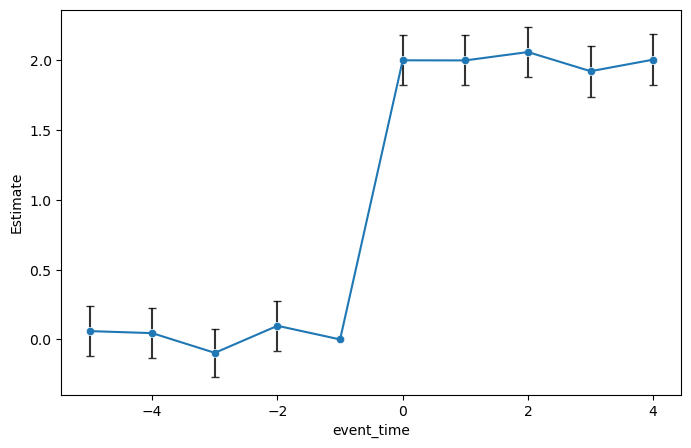

In [ ]:
event_study_plot, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(
    data=estimates, 
    x="event_time", 
    y="Estimate",  
    errorbar=None,
    ax=ax
)
sns.scatterplot(
    data=estimates, 
    x="event_time", 
    y="Estimate", 
    ax=ax
)
if ribbons:
    ax.errorbar(
        x=estimates["event_time"],
        y=estimates["Estimate"],
        yerr=1.96 * estimates["Std. Error"],
        fmt="none",
        ecolor="black",
        capsize=3,
        alpha=0.8,
        zorder=0
    )
else:
    ax.fill_between(
        x=estimates["event_time"],
        y1=estimates["lower_bound"],
        y2=estimates["upper_bound"],
        color="gray",
        alpha=0.3
    )

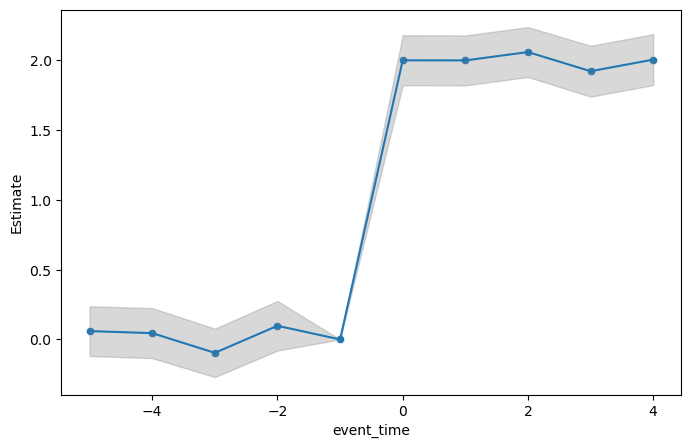

In [ ]:
event_study_plot, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(
    data=estimates, 
    x="event_time", 
    y="Estimate",  
    errorbar=None,
    ax=ax
)
sns.scatterplot(
    data=estimates, 
    x="event_time", 
    y="Estimate", 
    ax=ax
)
if ribbons:
    ax.fill_between(
        x=estimates["event_time"],
        y1=estimates["lower_bound"],
        y2=estimates["upper_bound"],
        color="gray",
        alpha=0.3
    )

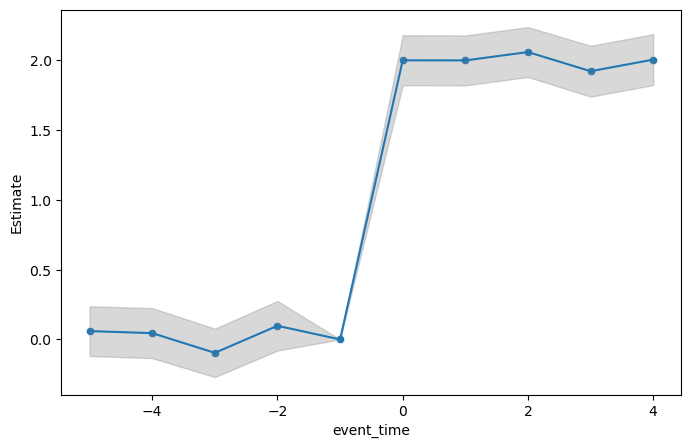

In [ ]:
ribbons=True
event_study_plot, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(
    data=estimates, 
    x="event_time", 
    y="Estimate",  
    errorbar=None,
    ax=ax
)
sns.scatterplot(
    data=estimates, 
    x="event_time", 
    y="Estimate", 
    ax=ax
)
if ribbons:
    ax.fill_between(
        x=estimates["event_time"],
        y1=estimates["lower_bound"],
        y2=estimates["upper_bound"],
        color="gray",
        alpha=0.3
    )
else:
    ax.errorbar(
        x=estimates["event_time"],
        y=estimates["Estimate"],
        yerr=1.96 * estimates["Std. Error"],
        fmt="none",
        ecolor="black",
        capsize=3,
        alpha=0.8,
        zorder=0
    )

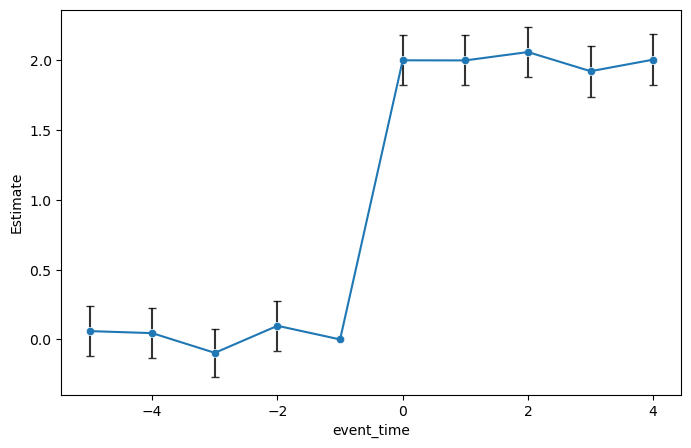

In [ ]:
ribbons=False
event_study_plot, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(
    data=estimates, 
    x="event_time", 
    y="Estimate",  
    errorbar=None,
    ax=ax
)
sns.scatterplot(
    data=estimates, 
    x="event_time", 
    y="Estimate", 
    ax=ax
)
if ribbons:
    ax.fill_between(
        x=estimates["event_time"],
        y1=estimates["lower_bound"],
        y2=estimates["upper_bound"],
        color="gray",
        alpha=0.3
    )
else:
    ax.errorbar(
        x=estimates["event_time"],
        y=estimates["Estimate"],
        yerr=1.96 * estimates["Std. Error"],
        fmt="none",
        ecolor="black",
        capsize=3,
        alpha=0.8,
        zorder=0
    )